# Project Number 4 (Project Dynamics M20)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


HR Analytics Project-
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?


HR Analytics -
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


Attrition in HR-
Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.


In [2]:
data=pd.read_csv('hr.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA

In [3]:
df=pd.DataFrame(data=data)
df
# dataset contains 35 columns & 1470 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df1=df.copy()
# taking oa copy of the dataset. lets do EDA on this dataset

In [5]:
df1.info()
# we can observe no null bvalues present in the dataset
# datatype - mix of object and numerical columns
# Target - Attrition 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df1['BusinessTravel'].unique()
# three catagories are present

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [8]:
le=LabelEncoder()

In [9]:
df1['BusinessTravel']=le.fit_transform(df1['BusinessTravel'])
# Converting object column into a numerical one

In [10]:
df1['Attrition']=le.fit_transform(df1['Attrition'])
# Converting object column into a numerical one

In [11]:
df1['Department'].unique()
# three departments exits in this dataset

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
df1['Department']=le.fit_transform(df1['Department'])
# Converting object column into a numerical one(sales=0,r&d=1,HR=2)

In [13]:
df1['Education'].unique()
# 5 categories
# already labelencoded

array([2, 1, 4, 3, 5], dtype=int64)

In [14]:
df1['EducationField'].unique()
# 6 categories 

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [15]:
df1['EducationField']=le.fit_transform(df1['EducationField'])
# Converting object column into a numerical one

In [16]:
df1['EmployeeCount'].unique()
#this column contains only one value. We can drop this column since it doesnt have any relevnace with target

array([1], dtype=int64)

In [17]:
df1['EmployeeNumber'].unique()
#this column contains serial number wise employee number. We can drop this column since it doesnt have any relevnace with target

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [18]:
df1['EnvironmentSatisfaction'].unique()
# 4 categories, alreday labelencoded

array([2, 3, 4, 1], dtype=int64)

In [19]:
df1['Gender'].unique()
# 2 categories

array(['Female', 'Male'], dtype=object)

In [20]:
df1['Gender']=le.fit_transform(df1['Gender'])
#Converting object column into a numerical one(female=0, male=1)

In [21]:
df1['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [22]:
df1['HourlyRate']=le.fit_transform(df1['HourlyRate'])

In [23]:
df1['JobInvolvement'].unique()
# 4 categories, alreday labelencoded

array([3, 2, 4, 1], dtype=int64)

In [24]:
df1['JobLevel'].unique()
# 4 categories, alreday labelencoded

array([2, 1, 3, 4, 5], dtype=int64)

In [25]:
df1['JobRole'].unique()
# 9 categories 

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [26]:
df1['JobRole']=le.fit_transform(df1['JobRole'])
# Converting object column into a numerical one

In [27]:
df1['JobSatisfaction'].unique()
# 4 categories, alreday labelencoded

array([4, 2, 3, 1], dtype=int64)

In [28]:
df1['MaritalStatus'].unique()
# 3 categories

array(['Single', 'Married', 'Divorced'], dtype=object)

In [29]:
df1['MaritalStatus']=le.fit_transform(df1['MaritalStatus'])
# Converting object column into a numerical one(single=0, married=1,divorced=2)

In [30]:
df1['MonthlyIncome'].unique()
# continous value

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [31]:
df1['MonthlyRate'].unique()
# continous value

array([19479, 24907,  2396, ...,  5174, 13243, 10228], dtype=int64)

In [32]:
df1['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [33]:
df1['Over18'].unique()
# all employes are of adult age group
# this column contains only one category. We can drop this column since it doesnt have any relevnace with target

array(['Y'], dtype=object)

In [34]:
df1['OverTime'].unique()
# two categories

array(['Yes', 'No'], dtype=object)

In [35]:
df1['OverTime']=le.fit_transform(df1['OverTime'])
#Converting object column into a numerical one(yes=0, no=1)

In [36]:
df1['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [37]:
df1['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [38]:
df1['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [39]:
df1['StandardHours'].unique()
# this column contains only one value. We can drop this column since it doesnt have any relevnace with target

array([80], dtype=int64)

In [40]:
df1['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [41]:
df1['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [42]:
df1['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [43]:
df1['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [44]:
df1['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [45]:
df1['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [46]:
df1['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [47]:
df1['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

In [48]:
# so lets drop the 4 columns mentioned above
df2=df1.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df2.head()
# dataset is having 31 columns now

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [49]:
df2.describe()
#daily rate -> heavily spread data
# most of the columns are nornally distributed

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b1f5908>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21108c552c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b1f5d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b1f5cc8>}

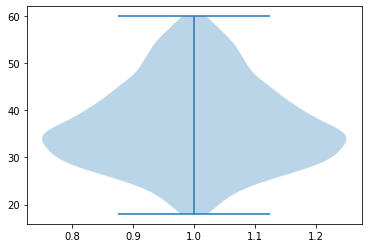

In [50]:
plt.violinplot(df2['Age'])
# most of the employess are aged between 30-40

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b2ac508>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b2833c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b2ace48>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b2acd88>}

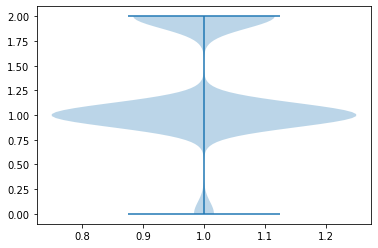

In [51]:
plt.violinplot(df2['Department'])
# R & D is having maximum number of employees

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b328f48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b2ac2c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b330f88>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b330ec8>}

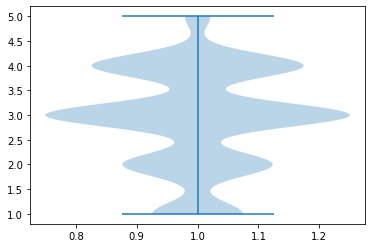

In [52]:
plt.violinplot(df2['Education'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b3a1548>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b2dd608>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b3a1d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b3a7c88>}

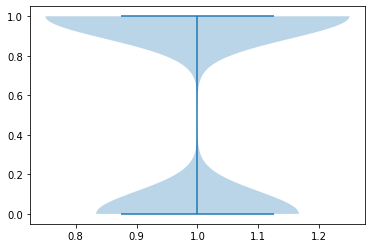

In [53]:
plt.violinplot(df2['Gender'])
# Males employees outnumbers female one 

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b408ac8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b3a12c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b40fa88>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b40f9c8>}

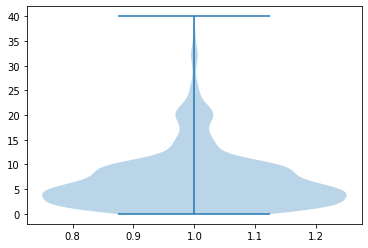

In [54]:
plt.violinplot(df2['YearsAtCompany'])
# Most of the employees are between 0-10 years in the company

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b476748>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b374b48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b47e948>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b47ee48>}

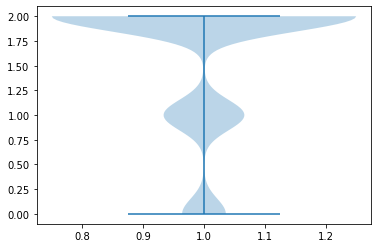

In [55]:
plt.violinplot(df2['BusinessTravel'])
# 'Non-Travel' category people are more than other categories

{'bodies': [<matplotlib.collections.PolyCollection at 0x2110b4b8908>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2110b4764c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2110b4ebcc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2110b4f1c48>}

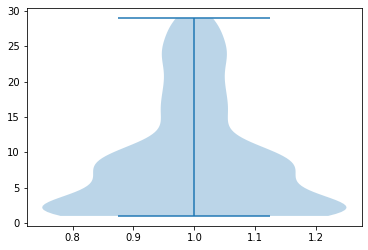

In [56]:
plt.violinplot(df2['DistanceFromHome'])
# Most of the employees stay close of the company

# Bivariate Analysis

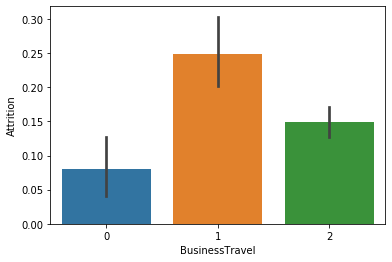

In [57]:
sns.barplot(x='BusinessTravel',y='Attrition',data=df2)
# 'travel-frequently' employees seem to have higher attrition rate

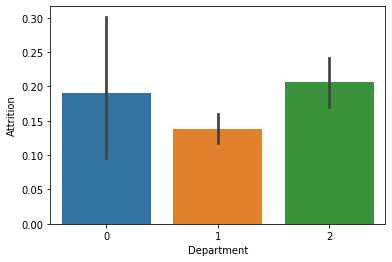

In [58]:
sns.barplot(x='Department',y='Attrition',data=df2)
# Sales & HR department employees are having higher attrition rate

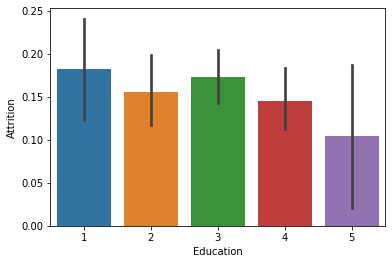

In [59]:
sns.barplot(x='Education',y='Attrition',data=df2)
# category 5 employees are showing lower attrition rate

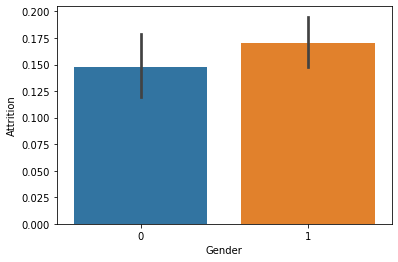

In [60]:
sns.barplot(x='Gender',y='Attrition',data=df2)
# Male employees are having higher attrition rate

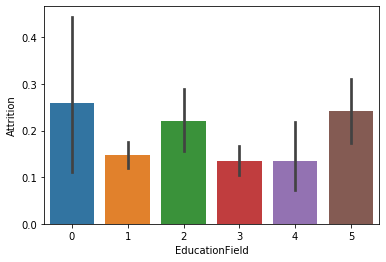

In [61]:
sns.barplot(x='EducationField',y='Attrition',data=df2)
# employees with 'Lifescience'& 'HR' background are showing higher attrition tendency

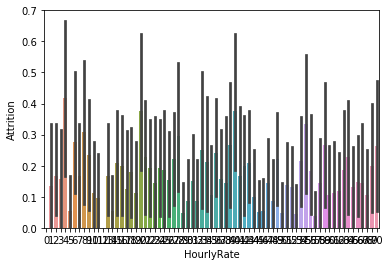

In [62]:
sns.barplot(x='HourlyRate',y='Attrition',data=df2)

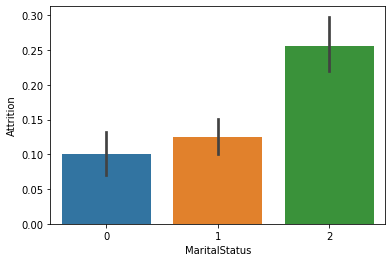

In [63]:
sns.barplot(x='MaritalStatus',y='Attrition',data=df2)
# Divorced employees are shwoing higher attrition rate

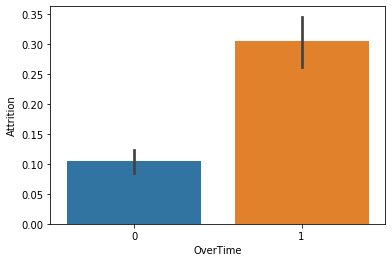

In [64]:
sns.barplot(x='OverTime',y='Attrition',data=df2)
# employees with 'no' overtime are showing higher rate of attrition

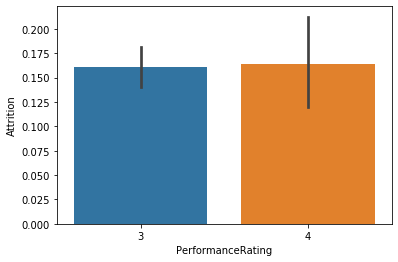

In [65]:
sns.barplot(x='PerformanceRating',y='Attrition',data=df2)

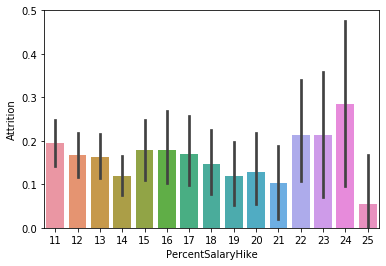

In [66]:
sns.barplot(x='PercentSalaryHike',y='Attrition',data=df2)
# here we can see employyes with higher percentage of salary hike are showing higher level of attrition

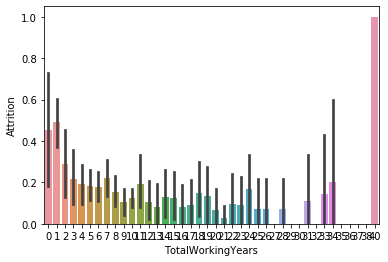

In [67]:
sns.barplot(x='TotalWorkingYears',y='Attrition',data=df2)

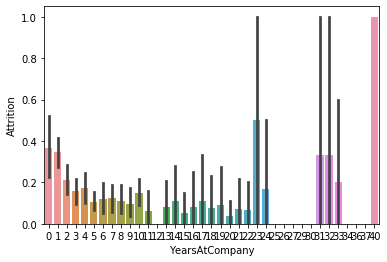

In [68]:
sns.barplot(x='YearsAtCompany',y='Attrition',data=df2)

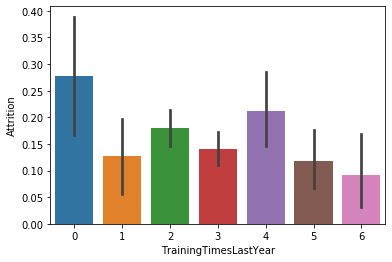

In [69]:
sns.barplot(x='TrainingTimesLastYear',y='Attrition',data=df2)
# employees with no training are more prone leave the company

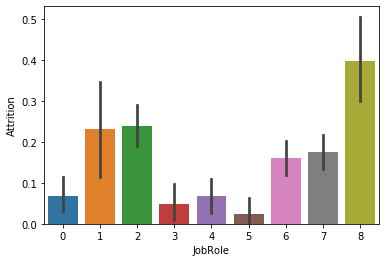

In [70]:
sns.barplot(x='JobRole',y='Attrition',data=df2)
# employees from HR jobprofile are showing higher rate of attrition

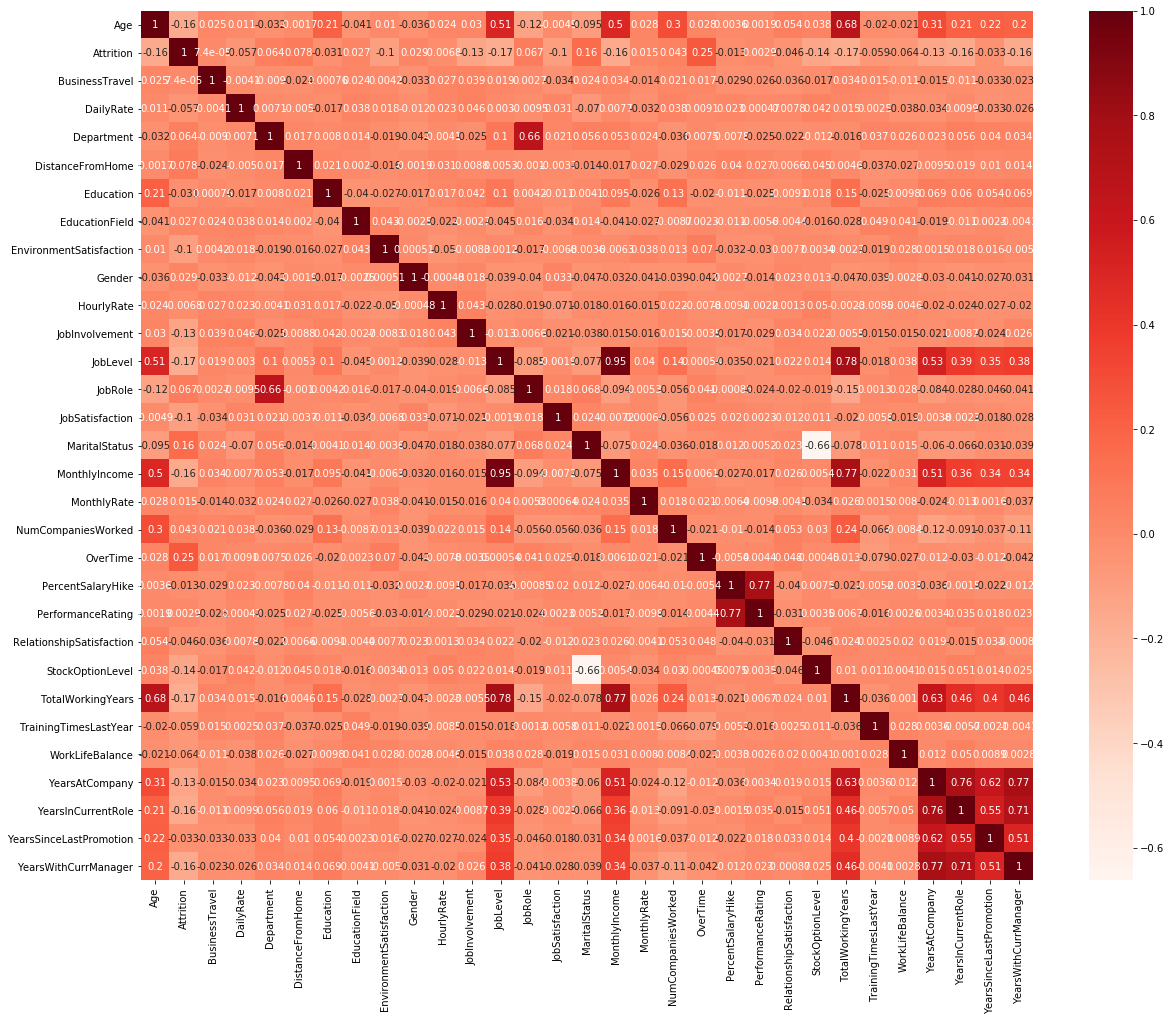

In [71]:
plt.figure(figsize=(20,16))
sns.heatmap(df2.corr(),cmap='Reds',annot=True)
# checking co relation with target column.
# we can observe there are various parameters which affects the attrition
# column with negative corelation are affecting attrition rate more

# Data PreProcessing and Model Training 

In [72]:
# Separating Feature variables and Target variable
x=df2.drop('Attrition',axis=1)
y=df2['Attrition']

In [73]:
x.shape,y.shape

((1470, 30), (1470,))

Since the Target is binary, we have apply classification algorithms to train the model 

In [74]:
# Optimising the seed value (random state)
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.8435374149659864
accuracy score correspondng to random state 42 is: 0.8571428571428571
accuracy score correspondng to random state 43 is: 0.8231292517006803
accuracy score correspondng to random state 44 is: 0.8594104308390023
accuracy score correspondng to random state 45 is: 0.81859410430839
accuracy score correspondng to random state 46 is: 0.81859410430839
accuracy score correspondng to random state 47 is: 0.8412698412698413
accuracy score correspondng to random state 48 is: 0.8480725623582767
accuracy score correspondng to random state 49 is: 0.8299319727891157
accuracy score correspondng to random state 50 is: 0.8412698412698413
accuracy score correspondng to random state 51 is: 0.8299319727891157
accuracy score correspondng to random state 52 is: 0.8367346938775511
accuracy score correspondng to random state 53 is: 0.8503401360544217
accuracy score correspondng to random state 54 is: 0.8208616780045351
accuracy score correspon

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.3)

In [76]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.8639455782312925
[[381   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       381
           1       0.00      0.00      0.00        60

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.75      0.86      0.80       441

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

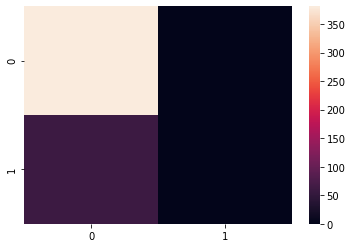

In [77]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print(sns.heatmap(matrix))
print('\n')

In [78]:
# lets cross validate incase the score improves
cvs=cross_val_score(lg,x,y,cv=10,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.84353741 0.83673469 0.83673469 0.84353741 0.83673469 0.84353741
 0.82993197 0.84353741 0.84353741 0.84353741]
0.8401360544217689


Lets apply other classification algorithm to optimise the score

In [79]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

In [86]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    cvs=cross_val_score(i,x,y,cv=10,scoring='accuracy').mean()
    matrix=confusion_matrix(y_test,pred)
    print('accuracy score of',i,'is:',AS)
    print(AS)
    print(matrix)
    print(classification_report(y_test,Pred))
    print(cvs)
    print('\n')

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.8117913832199547
0.8117913832199547
[[381   0]
 [ 58   2]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       381
           1       0.35      0.45      0.39        60

    accuracy                           0.81       441
   macro avg       0.63      0.66      0.64       441
weighted avg       0.83      0.81      0.82       441

0.7931972789115646


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamm

None of the above algorithms are achieving good enoiugh score. so lets try to boost the score with ensemble techniques

In [81]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
# So lets settle with this 

1.0

In [83]:
predrf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

# saving the model 

In [84]:
joblib.dump(rf,'rfhr.obj')

['rfhr.obj']